In [77]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt

In [78]:
import os
os.getcwd()

'C:\\Users\\hp\\Downloads\\SLR_6 - Regression   FE- (Week-6)\\6 - Regression + FE- (Week-6)\\Day01\\Takehome'

In [155]:
data = pd.read_csv('sap_stock.csv')
data.head()

,Date,Open,High,Low,Close,Change,Traded Volume,Turnover,Last Price of the Day,Daily Traded Units,Daily Turnover
0,2009-03-09,25.16,25.82,24.48,25.59,NaN,5749357.0,145200289.0,NaN,NaN,NaN
1,2009-03-10,25.68,26.95,25.68,26.87,NaN,7507770.0,198480965.0,NaN,NaN,NaN
2,2009-03-11,26.50,26.95,26.26,26.64,NaN,5855095.0,155815439.0,NaN,NaN,NaN
3,2009-03-12,26.15,26.47,25.82,26.18,NaN,6294955.0,164489409.0,NaN,NaN,NaN
4,2009-03-13,26.01,26.24,25.65,25.73,NaN,6814568.0,176228331.0,NaN,NaN,NaN


In [156]:
data.shape

(2550, 11)

In [157]:
data.describe()

,Open,High,Low,Close,Change,Traded Volume,Turnover,Last Price of the Day,Daily Traded Units,Daily Turnover
count,2242.000000,2543.000000,2543.000000,2550.000000,11.000000,2.504000e+03,2.497000e+03,0.0,0.0,7.0
mean,56.686896,61.563225,60.535073,60.995955,-0.070000,3.296818e+06,1.828440e+08,NaN,NaN,0.0
std,18.320821,21.184135,20.934460,21.097480,0.709761,2.004323e+06,9.350710e+07,NaN,NaN,0.0
min,25.160000,25.820000,24.480000,25.590000,-0.740000,0.000000e+00,1.767350e+05,NaN,NaN,0.0
25%,41.500000,43.430000,42.590000,42.950000,-0.500000,2.131686e+06,1.300462e+08,NaN,NaN,0.0
50%,56.560000,58.480000,57.580000,58.015000,-0.290000,2.852772e+06,1.626544e+08,NaN,NaN,0.0
75%,67.732500,78.365000,77.085000,77.762500,0.085000,3.878528e+06,2.104511e+08,NaN,NaN,0.0
max,100.100000,108.520000,107.020000,107.800000,1.250000,3.645671e+07,1.369431e+09,NaN,NaN,0.0


In [158]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Change', 'Traded Volume',
       'Turnover', 'Last Price of the Day', 'Daily Traded Units',
       'Daily Turnover'],
      dtype='object')

In [159]:
df = pd.DataFrame(data, columns=('Close','Date'))
df.head()

,Close,Date
0,25.59,2009-03-09
1,26.87,2009-03-10
2,26.64,2009-03-11
3,26.18,2009-03-12
4,25.73,2009-03-13


In [107]:
df.shape

(2550, 2)

In [108]:
df.isnull().sum()

Close    0
Date     0
dtype: int64

In [109]:
df.isnull().values.any()

False

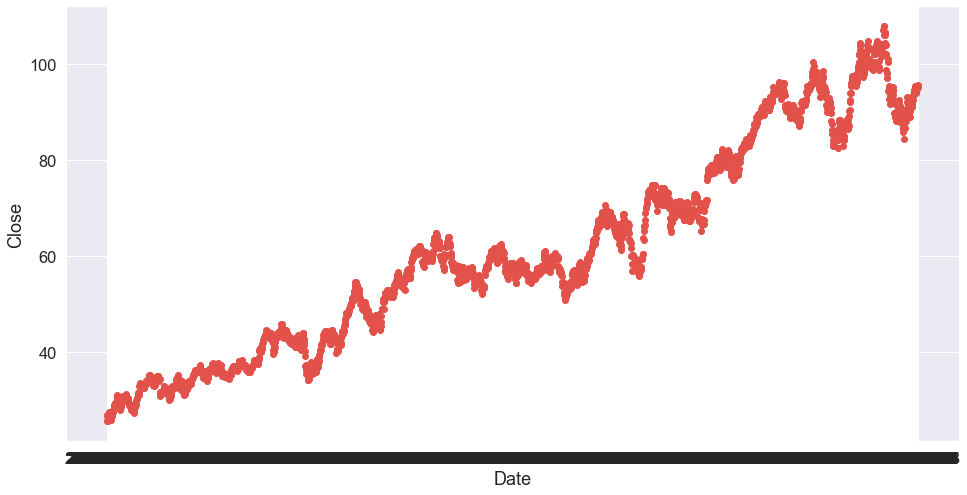

In [110]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['Date'], df['Close'])
ax.set_xlabel('Date')
ax.set_ylabel('Close')
plt.show()

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 2 columns):
Close    2550 non-null float64
Date     2550 non-null int64
dtypes: float64(1), int64(1)
memory usage: 39.9 KB


In [117]:
import datetime as dt
#df['Date'] = pd.Series([dt.datetime(df['Date'])], errors='coerce')
#df['Date'] = df['Date'].dt
#df['Date'].dt.year
df['year'] = pd.DatetimeIndex(df['Date']).year
df.head()

,Close,Date,year
0,25.59,733475,1970
1,26.87,733476,1970
2,26.64,733477,1970
3,26.18,733478,1970
4,25.73,733479,1970


In [127]:
dff = pd.DataFrame(df,columns=('Close','year'))
dff.head()

,Close,year
0,25.59,1970
1,26.87,1970
2,26.64,1970
3,26.18,1970
4,25.73,1970


In [149]:
df.head(1)

,Close,Date,year
0,25.59,733475,1970


In [150]:
## Raw linear regression model
X = df['Date'].values.reshape(-1, 1)
y= df['Close'].values.reshape(-1, 1)

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x, y)

print(f'Coefficients: {lin_reg.coef_}')
print(f'Intercept: {lin_reg.intercept_}')
print(f'R^2 score: {lin_reg.score(X, y)}')

Coefficients: [[0.01932714]]
Intercept: [-14150.0637711]
R^2 score: 0.9336053464374153


In [141]:
from sklearn.model_selection import train_test_split
# train data - 70% and test data - 30%
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 1)
x_train= x_train.values.reshape(-1, 1)
y_train= y_train.values.reshape(-1, 1)
x_test = x_test.values.reshape(-1, 1)
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)


AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [151]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
model = lin_reg.fit(x_train,y_train)
#print(f'R^2 score for train: {lin_reg.score(x_train, y_train)}')
#print(f'R^2 score for test: {lin_reg.score(x_test, y_test)}')

In [152]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
    
linearity_test(lin_reg, y)  

TypeError: predict() missing 1 required positional argument: 'X'

In [153]:
import statsmodels.api as sm
sm.stats.diagnostic.linear_rainbow(res=lin_reg, frac=0.5)

AttributeError: 'LinearRegression' object has no attribute 'nobs'

In [160]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Change', 'Traded Volume',
       'Turnover', 'Last Price of the Day', 'Daily Traded Units',
       'Daily Turnover'],
      dtype='object')

In [174]:
data1=data.drop(['Date','Change','Last Price of the Day','Daily Turnover','Daily Traded Units'], axis=1)

data1.isnull().sum()

Open             308
High               7
Low                7
Close              0
Traded Volume     46
Turnover          53
dtype: int64

In [172]:
data1.head()

,Open,High,Low,Close,Traded Volume,Turnover
0,25.16,25.82,24.48,25.59,5749357.0,145200289.0
1,25.68,26.95,25.68,26.87,7507770.0,198480965.0
2,26.50,26.95,26.26,26.64,5855095.0,155815439.0
3,26.15,26.47,25.82,26.18,6294955.0,164489409.0
4,26.01,26.24,25.65,25.73,6814568.0,176228331.0


In [173]:
X = data1.drop('Close', axis=1)
y= data1['Close']
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

print(f'Coefficients: {lin_reg.coef_}')
print(f'Intercept: {lin_reg.intercept_}')
print(f'R^2 score: {lin_reg.score(X, y)}')

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').